In [3]:
import os
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_bar
from plotnine import *
import numpy as np

In [4]:
os.chdir('/Users/najah/work/internships/meghna/LT05_L1TP_145044_20100428_20161016_01_T1')

In [5]:
random_points = pd.read_csv('./145044_20100428_indices/random_points_indices_data.csv')

In [ ]:
 random_points.head()

## distribution of classes

In [6]:
# converting the class category to factor
random_points['class_cat'] =random_points['class1'].astype('category')

In [7]:
classes = random_points['class_cat'].value_counts()#normalize = True)

In [8]:
cats = pd.Series(['Forest', 'Forest Fire', 'Forest Active Fire', 'Ag', "Ag Fire", 'Ag Active Fire', 'Shadow',
                  'Water', 'Cloud', 'No Data',' Others', 'Eutro', 'Unknown'
                 ])

numbers = pd.Series(list(range(1,14)))
d = {'class': numbers,'class_label': cats}
labels =pd.DataFrame(d)

In [9]:
class_data = pd.Series(classes).reset_index(). rename(columns = {'index': 'class', 'class_cat': 'Proportion'}).sort_values('class')


In [24]:
dist_table = pd.merge(labels, class_data, on='class' )
dist_table.to_csv('/Users/najah/work/internships/meghna/LT05_L1TP_145044_20100428_20161016_01_T1/fire_presentation/sample_data.csv')

In [12]:
random_points = pd.merge(random_points, labels, left_on = ['class1'] , right_on =['class'] )

## Visualisng the distributions of the bands and indices for the extracted points

###  Bands

In [13]:
## melting the data

bands_df = random_points[['class_label','b1', 'b2', 'b3', 'b4', 'b5', 'b7']].melt(id_vars = 'class_label', var_name = 'bands')
bands_df.head()

,class_label,bands,value
0,Others,b1,0.123110
1,Others,b1,0.118408
2,Others,b1,0.132513
3,Others,b1,0.118408
4,Others,b1,0.110180


In [14]:
bands_df = bands_df[bands_df['class_label']!='No Data']

In [15]:

line_df = bands_df.groupby(['class_label','bands']).mean().reset_index().rename(columns = {'value' : 'mean'})
line_df.head()



,class_label,bands,mean
0,Others,b1,0.116320
1,Others,b2,0.126658
2,Others,b3,0.174212
3,Others,b4,0.215473
4,Others,b5,0.245040


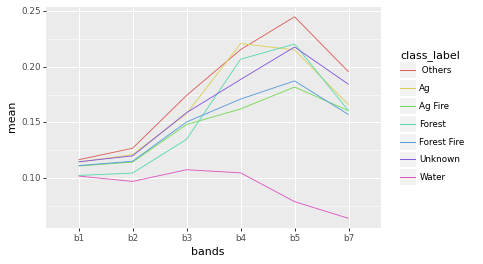

<ggplot: (346699114)>

In [16]:
(
ggplot(line_df)+
geom_line(aes(x = 'bands', y = 'mean', color = 'class_label', group = 'class_label'))

    
)

In [250]:

## incase if i need error bands


#line_df = bands_df.groupby(['class_label','bands']).agg(['mean', 'std']).droplevel(axis=1, level=0).reset_index()

# line_df['ymin'] = line_df['mean'] - line_df['std']
# line_df['ymax'] = line_df['mean'] + line_df['std']

# (
# ggplot(line_df)+
# geom_line(aes(x = 'bands', y = 'mean', color = 'class_label', group = 'class_label'))+
# geom_errorbar(aes(x="bands", ymin="mean-std",ymax="mean+std"))
    
# )

In [ ]:
(
ggplot(bands_df, aes(x = 'class_cat', y = 'value'))+
    geom_boxplot()+
    facet_wrap(['bands'])+
    theme_minimal()
)

/Users/najah/miniforge3/envs/ee/lib/python3.9/site-packages/plotnine/layer.py:334: PlotnineWarning: stat_boxplot : Removed 140 rows containing non-finite values.


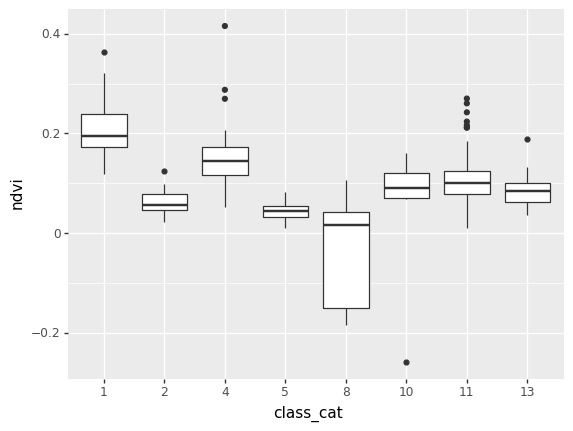

<ggplot: (393608861)>

In [21]:

(
ggplot(random_points, aes (y ="ndvi", x = 'class_cat'))+
    geom_boxplot()
)

In [17]:
indices_df = random_points[['class_label','ndvi', 'ndmi', 'nbr', 'bai', 'baims', 'baiml', 'mirbi', 'gemi']].melt(id_vars = 'class_label', var_name  = 'indice')

In [19]:
# filtering no data
indices_df = indices_df[indices_df['class_label']!='No Data']


In [296]:
indices_df.head()


,class_label,indice,value
0,Others,ndvi,0.122761
1,Others,ndvi,0.117272
2,Others,ndvi,0.056587
3,Others,ndvi,0.120563
4,Others,ndvi,0.130243


In [20]:
line_df_indices = indices_df.groupby(['class_label','indice']).mean().reset_index()
line_df_indices.head()

,class_label,indice,value
0,Others,bai,40.621104
1,Others,baiml,28.915099
2,Others,baims,21.178419
3,Others,gemi,0.388922
4,Others,mirbi,-2.446851


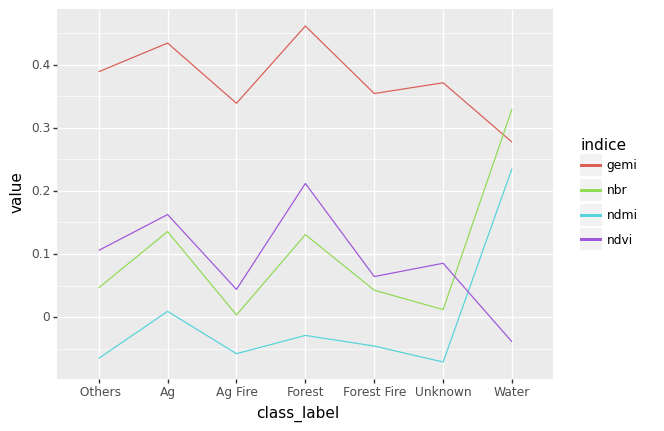

<ggplot: (400396014)>

In [299]:
(
ggplot(line_df_indices[~line_df_indices['indice'].isin(['bai', 'baiml', 'baims', 'mirbi'])], aes(x = 'class_label', y = 'value', color = 'indice', group = 'indice'))+
geom_line()
    
)mean

In [21]:
line_df_indices[~line_df_indices['indice'].isin(['bai', 'baiml', 'baims'])].head()

,class_label,indice,value
3,Others,gemi,0.388922
4,Others,mirbi,-2.446851
5,Others,nbr,0.046437
6,Others,ndmi,-0.065480
7,Others,ndvi,0.105683


In [22]:
##observe the nodata values

random_points[['ndvi', 'ndmi', 'nbr', 'bai', 'baims', 'baiml', 'mirbi', 'gemi']][random_points['class1']==10]

# do i needa perate mask for no data too?

,ndvi,ndmi,nbr,bai,baims,baiml,mirbi,gemi
180,NaN,NaN,NaN,73.529412,inf,inf,-2.0,0.125
181,NaN,NaN,NaN,73.529412,inf,inf,-2.0,0.125
182,NaN,NaN,NaN,73.529412,inf,inf,-2.0,0.125
183,NaN,NaN,NaN,73.529412,inf,inf,-2.0,0.125
184,NaN,NaN,NaN,73.529412,inf,inf,-2.0,0.125
...,...,...,...,...,...,...,...,...
321,NaN,NaN,NaN,73.529412,inf,inf,-2.0,0.125
322,NaN,NaN,NaN,73.529412,inf,inf,-2.0,0.125
323,NaN,NaN,NaN,73.529412,inf,inf,-2.0,0.125
324,NaN,NaN,NaN,73.529412,inf,inf,-2.0,0.125


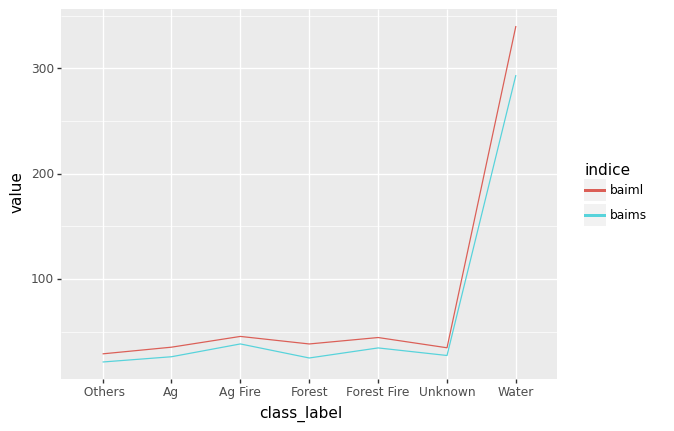

<ggplot: (346826364)>

In [23]:
(
ggplot(line_df_indices[line_df_indices['indice'].isin([ 'baiml', 'baims'])], aes(x = 'class_label', y = 'value', color = 'indice', group = 'indice'))+
geom_line()
    
)

BAI has an outlier. why
why not in envi

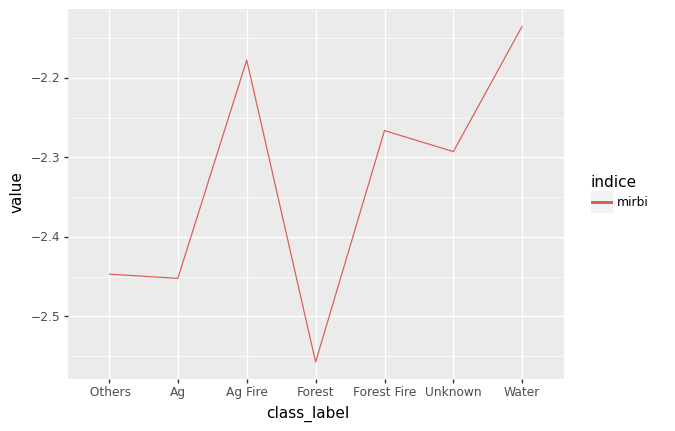

<ggplot: (400470562)>

In [302]:
(
ggplot(line_df_indices[line_df_indices['indice'].isin([ 'mirbi'])], aes(x = 'class_label', y = 'value', color = 'indice', group = 'indice'))+
geom_line()
    
)

/Users/najah/miniforge3/envs/ee/lib/python3.9/site-packages/plotnine/layer.py:334: PlotnineWarning: stat_boxplot : Removed 840 rows containing non-finite values.
/Users/najah/miniforge3/envs/ee/lib/python3.9/site-packages/plotnine/facets/facet.py:434: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
/Users/najah/miniforge3/envs/ee/lib/python3.9/site-packages/plotnine/facets/facet.py:440: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


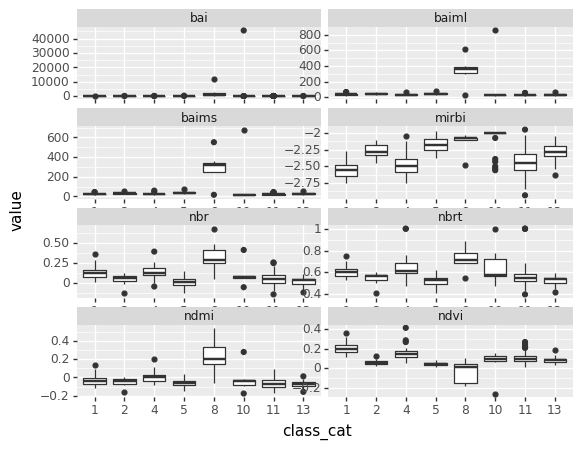

<ggplot: (395054391)>

In [47]:
(
ggplot(class_df, aes(y ='value', x = 'class_cat' ))+
geom_boxplot()+
facet_wrap(['variable'],scales = 'free', nrow =4)
    
)

In [304]:
indices_list = ['ndvi', 'ndmi', 'nbr', 'bai', 'baims', 'baiml', 'mirbi', 'gemi']

/Users/najah/miniforge3/envs/ee/lib/python3.9/site-packages/plotnine/layer.py:334: PlotnineWarning: stat_boxplot : Removed 140 rows containing non-finite values.


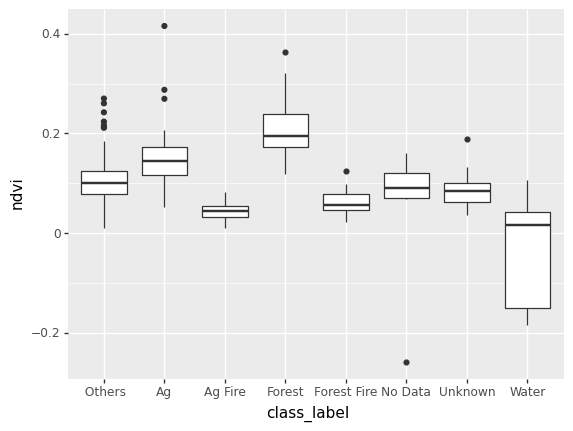

/Users/najah/miniforge3/envs/ee/lib/python3.9/site-packages/plotnine/layer.py:334: PlotnineWarning: stat_boxplot : Removed 140 rows containing non-finite values.


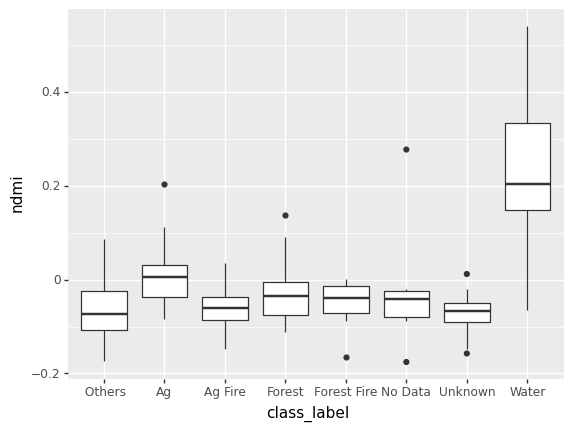

/Users/najah/miniforge3/envs/ee/lib/python3.9/site-packages/plotnine/layer.py:334: PlotnineWarning: stat_boxplot : Removed 140 rows containing non-finite values.


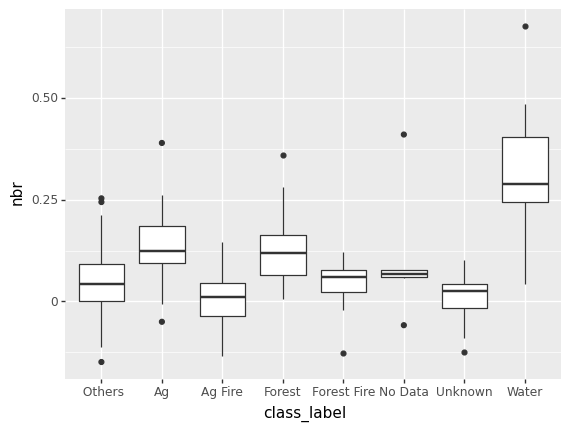

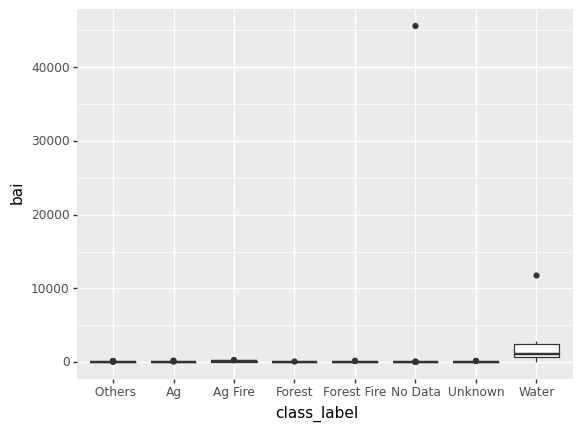

/Users/najah/miniforge3/envs/ee/lib/python3.9/site-packages/plotnine/layer.py:334: PlotnineWarning: stat_boxplot : Removed 140 rows containing non-finite values.


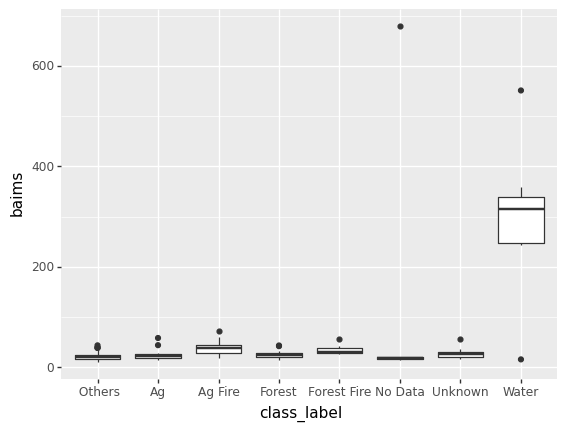

/Users/najah/miniforge3/envs/ee/lib/python3.9/site-packages/plotnine/layer.py:334: PlotnineWarning: stat_boxplot : Removed 140 rows containing non-finite values.


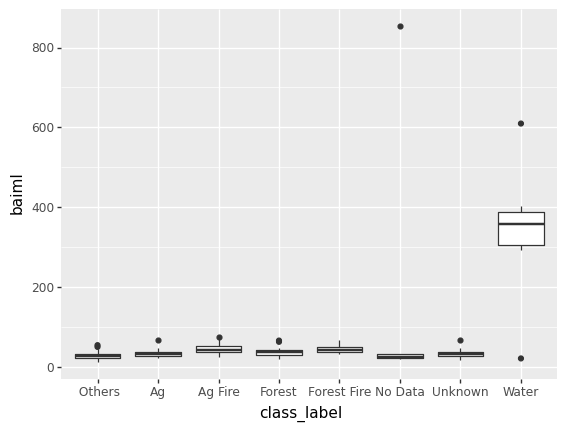

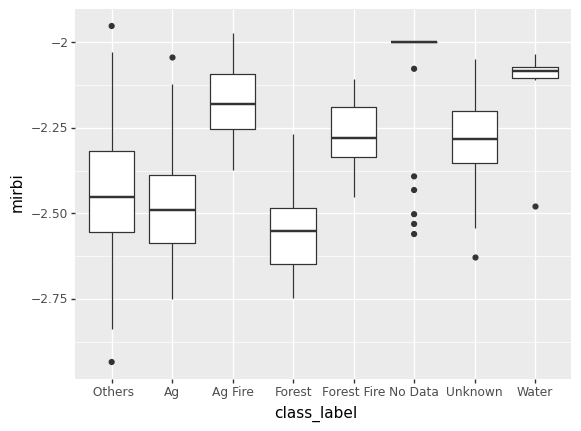

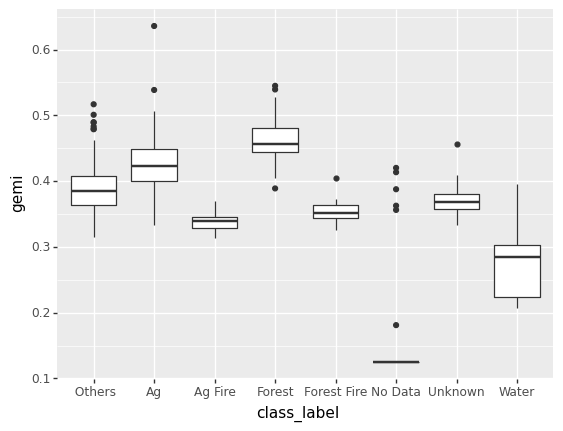

In [305]:
for indice in indices_list:
    (
    print(ggplot(random_points, aes (y =indice, x = 'class_label'))+
        geom_boxplot())
    )